# Check that new summary files are consistent

I've checked and the new summary files are similar to the old ones. 

In [1]:
import xarray as xr
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
date = '20170504'
init_time = '2000'

new_path = glob(f'/work/mflora/SummaryFiles/{date}/{init_time}/wofs_ENS_10*')[0]
old_path = glob(f'/oldscratch/skinnerp/2018_newse_post/summary_files/{date}/{init_time}/news-e_ENS_10*')[0]

In [3]:
ds_new = xr.load_dataset(new_path, decode_times=False)
ds_old = xr.load_dataset(old_path, decode_times=False)

0.0


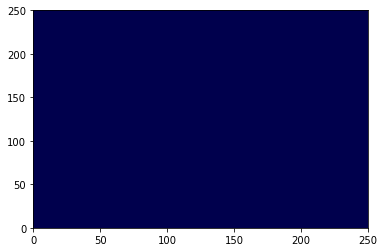

In [4]:
var_new = ds_new['w_up'].values[0,:,:] #1
var_old = ds_old['w_up'].values[0,:,:] #10
diff = var_new - var_old
print(np.max(diff))

plt.pcolormesh(diff, cmap='seismic')

In [5]:
import pandas as pd 

In [18]:
def name_changer(feature):

    # Changing from the old dataset to the new dataset. 
    name_changes = {'geopotential_height_500mb' : 'geo_hgt_500',
                'geopotential_height_700mb' : 'geo_hgt_700',
                'geopotential_height_850mb' : 'geo_hgt_850',
                'dewpoint_850mb' : 'td_850',
                'dewpoint_500mb' : 'td_500',
                'dewpoint_700mb' : 'td_700',
                '10-m_bulk_shear' : '10-500m_bulkshear',
                'cloud_top_temp' : 'ctt',
                'temperature_850mb' : 'temperature_850',
                'temperature_500mb' : 'temperature_500',
                'temperature_700mb' : 'temperature_700',
                'dbz_3to5km_max'        : 'dbz_3to5', 
                'dbz_1to3km_max'        : 'dbz_1to3', 
                'divergence_10m'    : 'div_10m',
                'bouyancy'          : 'buoyancy',
                'th_e_ml'           : 'theta_e',
               }

    if 'time' in feature and 'th' in feature:
        var, stat = feature.split('_time')
        time, stat = stat.split('ens')
        ens_stat = stat.split('_of')[0]#.replace('_', '')
    
        #'uh_0to2__time_max__amp_ens_mean'
        new_feature = f"{name_changes.get(var, var)}__time_{time.replace('_', '')}__amp_ens{ens_stat}"
        #print(new_feature)
    
    elif 'ens' in feature:
        var, ens_stat = feature.split('_ens')
        ens_stat = ens_stat.replace('_spatial_mean', '')

        new_feature = f'{name_changes.get(var, var)}__ens{ens_stat}__spatial_mean'
        if 'time' in feature:
            new_feature = new_feature.replace('_time', '__time')
        #print(new_feature)
    else:
        new_feature = feature 
    
    
    return new_feature

In [31]:
path = '/work/mflora/ML_DATA/INPUT_DATA/20170501/PROBABILITY_OBJECTS_20170501-0100_00.nc'
ds = xr.load_dataset(path)

df = pd.read_feather('/work/mflora/SummaryFiles/20170501/0100/wofs_MLDATA_06_20170502_0100_0130.feather')

In [32]:
ds

<xarray.Dataset>
Dimensions:                                          (example: 1)
Dimensions without coordinates: example
Data variables: (12/155)
    srh_0to1_ens_mean_spatial_mean                   (example) float64 410.5
    srh_0to3_ens_mean_spatial_mean                   (example) float64 460.9
    cape_ml_ens_mean_spatial_mean                    (example) float64 299.8
    cin_ml_ens_mean_spatial_mean                     (example) float64 -88.16
    shear_u_0to6_ens_mean_spatial_mean               (example) float64 42.95
    shear_v_0to6_ens_mean_spatial_mean               (example) float64 38.16
    ...                                               ...
    matched_to_severe_wind_15km                      (example) float64 0.0
    matched_to_tornado_0km                           (example) float64 0.0
    matched_to_tornado_15km                          (example) float64 0.0
    minor_axis_length                                (example) float64 2.923
    orientation                                      (example) float64 0.7569
    Initialization Time                              (example) float64 3.6e+03

In [33]:
#feature = 'w_up_time_max_ens_mean_of_90th'

var = 'uh_0to2'
feature = f'{var}_time_max_ens_std_spatial_mean'

ds[feature].values

array([1.15548992])

In [34]:
df[name_changer(feature)].values

array([1.15548985])

In [35]:
print(df['area'].values, ds['area'].values)

[26] [26.]
